(-0.05, 1.05)

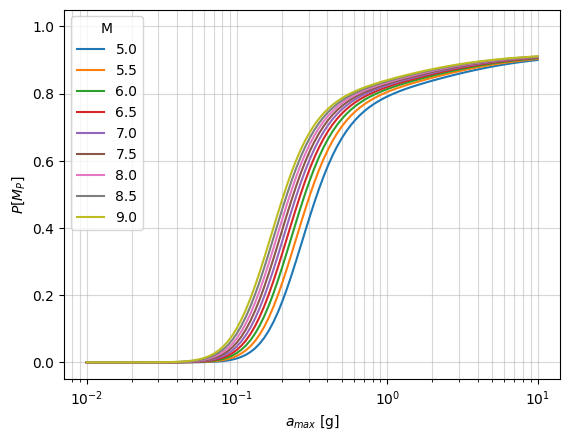

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
import smt

def interleave(v1, v2):
    vout = np.empty(2 * len(v1), dtype=float)
    vout[0::2] = v1
    vout[1::2] = v2
    return vout 
    
# Ready example CPT file and extract data into Numpy arrays
df = pd.read_csv('example_cpt.csv')
depth = df['depth'].values
qt = df['qt'].values
fs = df['fs'].values

# Define earthquake loading conditions
amax = np.logspace(-2, 1, 100)
m = np.asarray([5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0])
gamma = 19
dGWT = 2.0

pmp = smt.smt_model_fragility(depth, qt, fs, amax, m, dGWT=dGWT, gamma=gamma)
fig, ax = plt.subplots()
for i in range(len(m)):
    ax.plot(amax, pmp[i], label=m[i])
ax.set_xscale('log')
ax.grid(True, alpha=0.5, which='both')
ax.legend(title='M')
ax.set_xlabel(r'$a_{max}$ [g]')
ax.set_ylabel(r'$P[M_P]$')
ax.set_ylim(-0.05, 1.05)